In [ ]:
# library import

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdats
import matplotlib as mpl
%matplotlib inline

from datetime import date
import datetime

import plotly.figure_factory as ff
import plotly.plotly as py
import plotly.graph_objs as go

import pyecharts

In [2]:
# 그래프에서 한글을 표기하기 위한 글꼴 변경

from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Check your OS system.')

## 데이터 전처리

In [3]:
# (1) 인도 코로나 확진자 현황 csv 파일 불러오기
india = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')

In [4]:
# 필요한 column 선택 및 이름 변경
india = india[['Date', 'State', 'Confirmed', 'Deceased']]\
        .rename(columns={'Deceased':'Deaths'})
india

,Date,State,Confirmed,Deaths
0,2020-01-30,Kerala,1,0
1,2020-01-30,India,1,0
2,2020-02-02,Kerala,2,0
3,2020-02-02,India,2,0
4,2020-02-03,Kerala,3,0
...,...,...,...,...
19709,2021-09-08,Tripura,83411,800
19710,2021-09-08,India,33101592,441503
19711,2021-09-08,Uttar Pradesh,1709479,22863
19712,2021-09-08,Uttarakhand,343139,7389


In [5]:
# state 컬럼의 india는 중복 값이므로 제거 - 일별 합계데이터
is_india = india['State'] == 'India'
india = india[~is_india]

In [6]:
# 국가 컬럼 추가 - df merge
india['Country'] = 'India'

In [7]:
india

,Date,State,Confirmed,Deaths,Country
0,2020-01-30,Kerala,1,0,India
2,2020-02-02,Kerala,2,0,India
4,2020-02-03,Kerala,3,0,India
6,2020-02-14,Kerala,3,0,India
8,2020-03-02,Delhi,1,0,India
...,...,...,...,...,...
19708,2021-09-08,Tamil Nadu,2625778,35055,India
19709,2021-09-08,Tripura,83411,800,India
19711,2021-09-08,Uttar Pradesh,1709479,22863,India
19712,2021-09-08,Uttarakhand,343139,7389,India


####  tkinter 사용하여 파일 불러오기 창 팝업

In [8]:
# (2)방글라데시 csv 파일 불러오기
# GUI로 파일 선택창 열기
from tkinter import filedialog
from tkinter import *

root = Tk()
root.filename = filedialog.askopenfilename(\
                                           initialdir = "C:",
                                           title = "방글라데시 코로나바이러스 현황 csv 파일을 선택해주세요",
                                           filetypes = (('CSV', '*.csv'),('all files','*.*')))
print(root.filename)

C:/Users/oing9/Downloads/flevy.com-coronavirus-bangladesh.csv


In [9]:
path = root.filename
bangla = pd.read_csv(path)

In [10]:
# 필요한 column 선택 및 이름변경
bangla = bangla[['Date', 'New Cases', 'New Deaths']]\
        .rename(columns={'New Cases':'Confirmed', 'New Deaths':'Deaths'})

In [11]:
# 국가 컬럼 추가 
bangla['Country'] = 'Bangladesh'

In [12]:
bangla

,Date,Confirmed,Deaths,Country
0,2021-09-05,2430,70,Bangladesh
1,2021-09-04,1743,61,Bangladesh
2,2021-09-03,3167,70,Bangladesh
3,2021-09-02,3436,88,Bangladesh
4,2021-09-01,3062,79,Bangladesh
...,...,...,...,...
542,2020-03-12,0,0,Bangladesh
543,2020-03-11,0,0,Bangladesh
544,2020-03-10,0,0,Bangladesh
545,2020-03-09,0,0,Bangladesh


In [13]:
# 두개 dataframe concatenate

df = pd.concat([india, bangla], ignore_index=True)

In [14]:
df

,Date,State,Confirmed,Deaths,Country
0,2020-01-30,Kerala,1,0,India
1,2020-02-02,Kerala,2,0,India
2,2020-02-03,Kerala,3,0,India
3,2020-02-14,Kerala,3,0,India
4,2020-03-02,Delhi,1,0,India
...,...,...,...,...,...
19696,2020-03-12,NaN,0,0,Bangladesh
19697,2020-03-11,NaN,0,0,Bangladesh
19698,2020-03-10,NaN,0,0,Bangladesh
19699,2020-03-09,NaN,0,0,Bangladesh


In [15]:
# 병합된 DataFrame에 Month 정보 추가 >> period 사용
# Str >> TimeStamp >> period
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19701 entries, 0 to 19700
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       19701 non-null  datetime64[ns]
 1   State      19154 non-null  object        
 2   Confirmed  19701 non-null  int64         
 3   Deaths     19701 non-null  int64         
 4   Country    19701 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 769.7+ KB


In [17]:
month = [df['Date'][i].to_period(freq='M') for i in range(len(df['Date']))]

In [18]:
df['Month'] = month
df

,Date,State,Confirmed,Deaths,Country,Month
0,2020-01-30,Kerala,1,0,India,2020-01
1,2020-02-02,Kerala,2,0,India,2020-02
2,2020-02-03,Kerala,3,0,India,2020-02
3,2020-02-14,Kerala,3,0,India,2020-02
4,2020-03-02,Delhi,1,0,India,2020-03
...,...,...,...,...,...,...
19696,2020-03-12,NaN,0,0,Bangladesh,2020-03
19697,2020-03-11,NaN,0,0,Bangladesh,2020-03
19698,2020-03-10,NaN,0,0,Bangladesh,2020-03
19699,2020-03-09,NaN,0,0,Bangladesh,2020-03


## 데이터셋 활용

In [19]:
# Month, Country 기준 정렬
# .sort_values(by=['column'], axis=0)

pv_month_confirmed = df.sort_values(by=['Country'], axis=0)
pv_month_confirmed = df.sort_values(by=['Date'], axis=0)

In [20]:
pv_month_confirmed.head()

,Date,State,Confirmed,Deaths,Country,Month
0,2020-01-30,Kerala,1,0,India,2020-01
1,2020-02-02,Kerala,2,0,India,2020-02
2,2020-02-03,Kerala,3,0,India,2020-02
3,2020-02-14,Kerala,3,0,India,2020-02
4,2020-03-02,Delhi,1,0,India,2020-03


In [21]:
# 2021-9 데이터 제외 (9월은 진행중이므로 그래프 의미가 없다고 판단)

# 조건 비교를 위해 type을 동일하게 바꿔봄
# string >> timestamp >> period
a = pd.to_datetime('2021-09')
ard = a.to_period(freq='M')

# False 조건 생성
is_sep = (pv_month_confirmed['Month'] >= ard)

# 조건에 해당하는 것 제외하고 데이터 출력
pv_month_confirmed = pv_month_confirmed[~is_sep]

In [22]:
pv_month_confirmed.tail()

,Date,State,Confirmed,Deaths,Country,Month
18840,2021-08-31,Gujarat,825422,10081,India,2021-08
18841,2021-08-31,Himachal Pradesh,213548,3582,India,2021-08
18842,2021-08-31,Haryana,770486,9677,India,2021-08
18843,2021-08-31,Jharkhand,347867,5132,India,2021-08
18837,2021-08-31,Delhi,1437764,25082,India,2021-08


In [23]:
pv_month_confirmed

,Date,State,Confirmed,Deaths,Country,Month
0,2020-01-30,Kerala,1,0,India,2020-01
1,2020-02-02,Kerala,2,0,India,2020-02
2,2020-02-03,Kerala,3,0,India,2020-02
3,2020-02-14,Kerala,3,0,India,2020-02
4,2020-03-02,Delhi,1,0,India,2020-03
...,...,...,...,...,...,...
18840,2021-08-31,Gujarat,825422,10081,India,2021-08
18841,2021-08-31,Himachal Pradesh,213548,3582,India,2021-08
18842,2021-08-31,Haryana,770486,9677,India,2021-08
18843,2021-08-31,Jharkhand,347867,5132,India,2021-08


In [24]:
# Country가 India인 것으로 filter
filter_india = pv_month_confirmed[pv_month_confirmed['Country'] == 'India']

In [25]:
len(filter_india)

18866

In [26]:
# 발생월 기준으로 인도 데이터만 추출
pv_india = filter_india.pivot_table(values=['Confirmed', 'Deaths'],
                        index=['Month'], aggfunc=sum)

<AxesSubplot:title={'center':'인도 코로나바이러스 현황'}, xlabel='Month'>

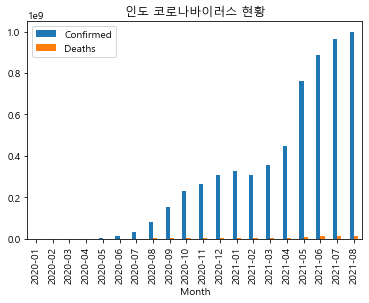

In [27]:
pv_india.plot(kind='bar', title='인도 코로나바이러스 현황')

In [28]:
pv_india['Deaths']

Month
2020-01           0
2020-02           0
2020-03         137
2020-04       14504
2020-05       94240
2020-06      332074
2020-07      813249
2020-08     1585652
2020-09     2478009
2020-10     3482168
2020-11     3910865
2020-12     4469880
2021-01     4715724
2021-02     4363244
2021-03     4942371
2021-04     5389754
2021-05     8511655
2021-06    11223805
2021-07    12807373
2021-08    13394220
Freq: M, Name: Deaths, dtype: int64

In [29]:
# Country가 Bangladesh인 것으로 filter
filter_bangla = pv_month_confirmed[pv_month_confirmed['Country']=='Bangladesh']

In [30]:
filter_bangla.head()

,Date,State,Confirmed,Deaths,Country,Month
19700,2020-03-08,NaN,3,0,Bangladesh,2020-03
19699,2020-03-09,NaN,0,0,Bangladesh,2020-03
19698,2020-03-10,NaN,0,0,Bangladesh,2020-03
19697,2020-03-11,NaN,0,0,Bangladesh,2020-03
19696,2020-03-12,NaN,0,0,Bangladesh,2020-03


In [31]:
# 발생월 기준으로 방글라데시 데이터만 추출
pv_bangla = filter_bangla.pivot_table(values=['Confirmed', 'Deaths'],
                                     index=['Month'], aggfunc=sum)

<AxesSubplot:title={'center':'방글라데시 코로나 현황'}, xlabel='Month'>

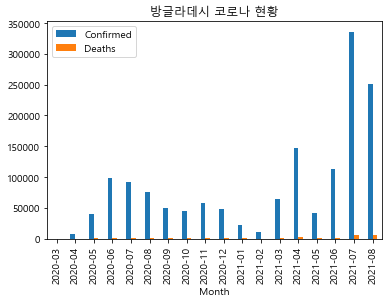

In [32]:
# 방글라데시 확진자/사망자 막대 그래프
pv_bangla.plot(kind='bar', title='방글라데시 코로나 현황')

In [33]:
# 발생월, 국가 기준 확진자/사망자 데이터 테이블 생성
pv_monthly = pv_month_confirmed[['Month', 'Country', 'Confirmed', 'Deaths']]
pv_monthly

,Month,Country,Confirmed,Deaths
0,2020-01,India,1,0
1,2020-02,India,2,0
2,2020-02,India,3,0
3,2020-02,India,3,0
4,2020-03,India,1,0
...,...,...,...,...
18840,2021-08,India,825422,10081
18841,2021-08,India,213548,3582
18842,2021-08,India,770486,9677
18843,2021-08,India,347867,5132


---

In [34]:
# 국가별 확진자/사망자 데이터 만들기

# Month와 Country 기준으로 합계 grouping
pv_confirmed = pv_monthly.groupby(['Month', 'Country']).sum()

In [35]:
pv_confirmed.head()

Confirmed  Deaths
Month   Country                      
2020-01 India               1       0
2020-02 India               8       0
2020-03 Bangladesh         51       5
        India           10832     137
2020-04 Bangladesh       7616     163

In [36]:
# Country index를 column으로 회전
pv_confirmed = pv_confirmed.unstack(-1)

In [37]:
pv_confirmed.head()

Confirmed                Deaths         
Country Bangladesh      India Bangladesh    India
Month                                            
2020-01        NaN        1.0        NaN      0.0
2020-02        NaN        8.0        NaN      0.0
2020-03       51.0    10832.0        5.0    137.0
2020-04     7616.0   449254.0      163.0  14504.0
2020-05    39486.0  3089437.0      482.0  94240.0

<AxesSubplot:title={'center':'인도/방글라데시 코로나 확진자 현황'}, xlabel='Month'>

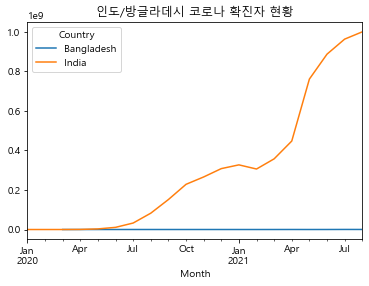

In [38]:
# Confirmed - 방글라데시/인도 그래프 생성
pv_confirmed['Confirmed'].plot(title='인도/방글라데시 코로나 확진자 현황')

<AxesSubplot:title={'center':'인도/방글라데시 코로나 사망자 현황'}, xlabel='Month'>

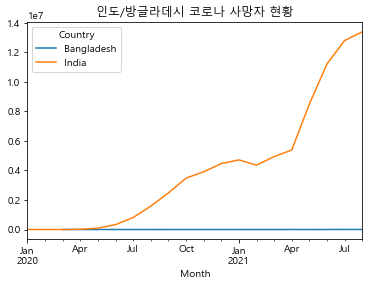

In [39]:
# Deaths - 방글라데시/인도 그래프 생성
pv_confirmed['Deaths'].plot(title='인도/방글라데시 코로나 사망자 현황')

<AxesSubplot:title={'center':'인도 코로나 확진자 현황'}, xlabel='Month'>

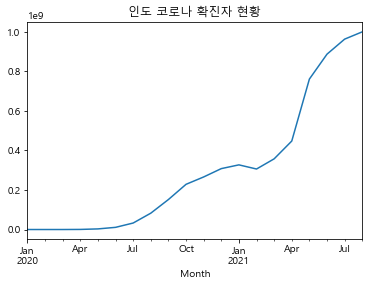

In [40]:
# 인도 확진자 수 그래프 생성
pv_india['Confirmed'].plot(title='인도 코로나 확진자 현황')

<AxesSubplot:title={'center':'인도 코로나 사망자 현황'}, xlabel='Month'>

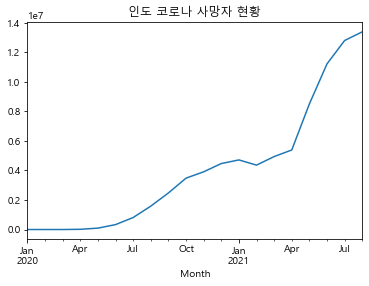

In [41]:
# 인도 사망자수 그래프 생성
pv_india['Deaths'].plot(title='인도 코로나 사망자 현황')

<AxesSubplot:title={'center':'방글라데시 코로나 확진자 현황'}, xlabel='Month'>

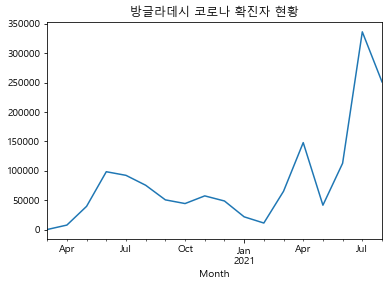

In [42]:
# 방글라데시 확진자 수 그래프 생성
pv_bangla['Confirmed'].plot(title='방글라데시 코로나 확진자 현황')

<AxesSubplot:title={'center':'방글라데시 코로나 사망자 현황'}, xlabel='Month'>

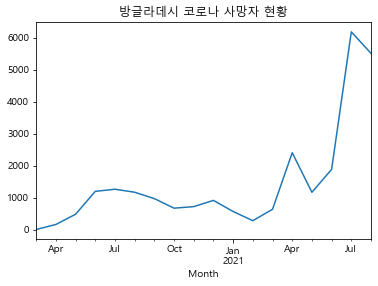

In [43]:
# 방글라데시 사망자 수 그래프 생성
pv_bangla['Deaths'].plot(title='방글라데시 코로나 사망자 현황')

In [1]:
# 위의 4개 그래프 모아서 그리기

plt.subplots(constrained_layout=True)


# 인도 - 확진자 수
# nrows=2, ncols=2, index=1
# 좌상단 그래프
plt.subplot(2, 2, 1)                
pv_india['Confirmed'].plot(color='#086972'', linestyle='--')
plt.title('[India] Confirmed cases', 
         fontdict={'fontsize':13,
                  'fontweight':500})
plt.ylabel('person')

# 방글라데시 - 확진자 수
# nrows=2, ncols=2, index=2
# 우상단 그래프
plt.subplot(2, 2, 2)                
pv_bangla['Confirmed'].plot(linestyle='--')
plt.title('[Bangladesh] Confirmed cases', 
         fontdict={'fontsize':13,
                  'fontweight':500})
plt.ylabel('person')


# 인도 - 사망자 수
# nrows=2, ncols=2, index=3
# 좌하단 그래프
plt.subplot(2, 2, 3)               
pv_india['Deaths'].plot(color='r', linestyle=':')
plt.title('[India] Deaths', 
         fontdict={'fontsize':13,
                  'fontweight':500})
plt.ylabel('person')

# 방글라데시 - 사망자 수
# nrows=2, ncols=2, index=4
# 우히단 그래프
plt.subplot(2, 2, 4)
pv_bangla['Deaths'].plot(linestyle=':')
plt.title('[Bangladesh] Deaths',
          fontdict={'fontsize':13,
                  'fontweight':500})
plt.ylabel('person')

SyntaxError: EOL while scanning string literal (<ipython-input-1-8dece1c5d902>, line 10)

In [45]:
# 월별-인도/방글라데시 확진자, 사망자 pivot

pv_month_confirmed = \
pv_month_confirmed.pivot_table(values=['Confirmed', 'Deaths'],
                                   index=['Month', 'Country'], aggfunc=sum)

In [46]:
pv_month_confirmed

Confirmed    Deaths
Month   Country                        
2020-01 India               1         0
2020-02 India               8         0
2020-03 Bangladesh         51         5
        India           10832       137
2020-04 Bangladesh       7616       163
        India          449254     14504
2020-05 Bangladesh      39486       482
        India         3089437     94240
2020-06 Bangladesh      98330      1197
        India        10963515    332074
2020-07 Bangladesh      92178      1264
        India        32864193    813249
2020-08 Bangladesh      75335      1170
        India        82700486   1585652
2020-09 Bangladesh      50483       970
        India       151659348   2478009
2020-10 Bangladesh      44205       672
        India       228590768   3482168
2020-11 Bangladesh      57248       721
        India       265831624   3910865
2020-12 Bangladesh      48578       915
        India       308009515   4469880
2021-01 Bangladesh      21629       568
        India       326971717   4715724
2021-02 Bangladesh      11077       281
        India       305986209   4363244
2021-03 Bangladesh      65079       638
        India       357476208   4942371
2021-04 Bangladesh     147837      2404
        India       447462176   5389754
2021-05 Bangladesh      41408      1169
        India       760878167   8511655
2021-06 Bangladesh     112718      1884
        India       886887836  11223805
2021-07 Bangladesh     336226      6182
        India       962850335  12807373
2021-08 Bangladesh     251134      5510
        India       999736390  13394220

---
일일 신규확진자 (기간: 9/01~9/05)

In [47]:
# raw 데이터셋 확인
df

,Date,State,Confirmed,Deaths,Country,Month
0,2020-01-30,Kerala,1,0,India,2020-01
1,2020-02-02,Kerala,2,0,India,2020-02
2,2020-02-03,Kerala,3,0,India,2020-02
3,2020-02-14,Kerala,3,0,India,2020-02
4,2020-03-02,Delhi,1,0,India,2020-03
...,...,...,...,...,...,...
19696,2020-03-12,NaN,0,0,Bangladesh,2020-03
19697,2020-03-11,NaN,0,0,Bangladesh,2020-03
19698,2020-03-10,NaN,0,0,Bangladesh,2020-03
19699,2020-03-09,NaN,0,0,Bangladesh,2020-03
